In [1]:
import numpy as np
np.random.seed(20)
import matplotlib.pyplot as plt
import pandas as pd
# Retina display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


MakeMoons Dataset

1.1 Fixed Train-Test (70:30) split ; No KFold CV

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

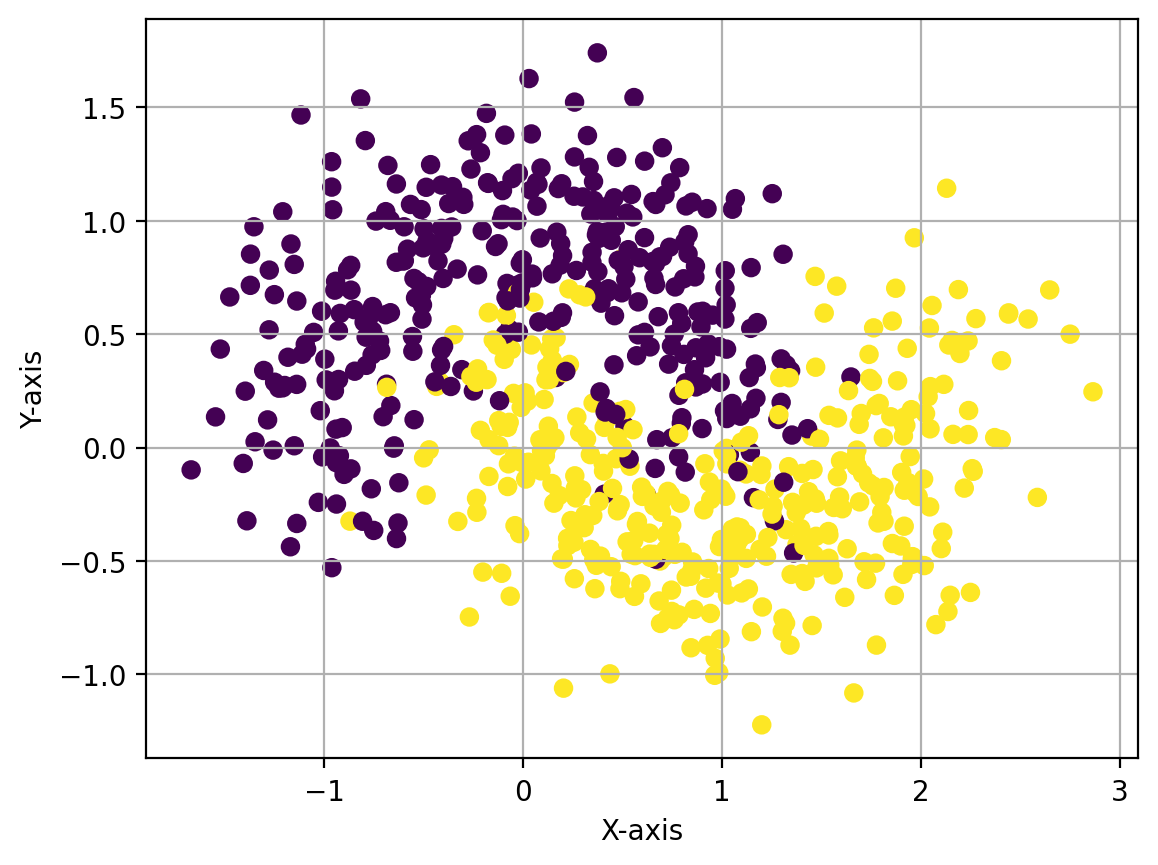

In [3]:
#latexify(fig_width=5, fig_height=4)
def format_axes(ax):
    # Add your desired formatting here, e.g.,
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.grid(True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train')
format_axes(plt.gca())
plt.show()

In [4]:
#hyperparameters take their default values
SVC_classifier = SVC(kernel='rbf')
SVC_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_accuracy = SVC_classifier.score(X_test, y_test)
print("Test set accuracy: {:.4f}".format(test_accuracy))

Test set accuracy: 0.9133


1.2 Multiple Random Train-Test splits

In [5]:
# Initialize an empty list to store the accuracy metrics
accuracy_metrics = []
all_test_sets = []
all_predictions = []

# Perform 20 random train-test splits and repeat the fit
for _ in range(20):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(100))

   # Create and fit the decision tree classifier
    #SVC_classifier = SVC_classifier.score(X_test, y_test) # This line was causing the error. Removed it
    SVC_classifier = SVC(kernel='rbf') # Create a new SVC object in each iteration
    SVC_classifier.fit(X_train, y_train)

    current_predictions = SVC_classifier.predict(X_test)
    all_predictions.append(current_predictions)
    current_accuracy = np.mean(current_predictions == y_test)
    all_test_sets.append(y_test)


    # Calculate the accuracy on the test set
    test_accuracy = SVC_classifier.score(X_test, y_test)

    # Append the accuracy to the list
    accuracy_metrics.append(test_accuracy)

# Calculate the mean and standard deviation of the accuracy metrics
mean_accuracy = np.mean(accuracy_metrics)
std_accuracy = np.std(accuracy_metrics)

# Print the mean and standard deviation
print("Mean accuracy: {:.4f}".format(mean_accuracy))
print("Standard deviation: {:.4f}".format(std_accuracy))

# Print minimum and maximum accuracies
print("Minimum accuracy: {:.4f}".format(min(accuracy_metrics)))
print("Maximum accuracy: {:.4f}".format(max(accuracy_metrics)))


Mean accuracy: 0.9145
Standard deviation: 0.0138
Minimum accuracy: 0.8800
Maximum accuracy: 0.9400


1.3 K-Fold Cross Validation: The following code is a user-defined implementation of K Fold

In [6]:
import numpy as np
# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []

# Calculate the size of each fold
fold_size = len(X) // k

# Perform k-fold cross-validation
for i in range(k):
    # Split the data into training and test sets
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    test_set = X[test_start:test_end]
    test_labels = y[test_start:test_end]

    training_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    training_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)

    # Train the model
    SVC_classifier = SVC(kernel='rbf')
    SVC_classifier.fit(training_set, training_labels)

    # Make predictions on the validation set
    fold_predictions = SVC_classifier.predict(test_set)

    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)

    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

# Print the predictions and accuracies of each fold
for i in range(k):
    print("Fold {}: Accuracy: {:.4f}".format(i+1, accuracies[i]))


Fold 1: Accuracy: 0.8950
Fold 2: Accuracy: 0.9250
Fold 3: Accuracy: 0.9400
Fold 4: Accuracy: 0.9100
Fold 5: Accuracy: 0.9250


The following code applies Sklearn's KFold. You can use any option. Notice, both give similar results.

In [7]:
from sklearn.model_selection import KFold

# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []

# Create a KFold instance
kf = KFold(n_splits=k, shuffle=False)

# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and test sets
    training_set, test_set = X[train_index], X[test_index]
    training_labels, test_labels = y[train_index], y[test_index]

    # Train the model
    SVC_classifier = SVC(kernel='rbf')
    SVC_classifier.fit(training_set, training_labels)

    # Make predictions on the validation set
    fold_predictions = SVC_classifier.predict(test_set)

    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)

    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

    # Print the predictions and accuracy of each fold
    print("Fold {}: Accuracy: {:.4f}".format(i+1, fold_accuracy))

Fold 1: Accuracy: 0.8950
Fold 2: Accuracy: 0.9250
Fold 3: Accuracy: 0.9400
Fold 4: Accuracy: 0.9100
Fold 5: Accuracy: 0.9250


In [8]:
from sklearn.metrics import accuracy_score

# Method 1 for computing accuracy
accuracy_1 = accuracy_score(y, np.concatenate(list(predictions.values())))

# Calculate macro-averaged accuracy
accuracy_2 = np.mean(accuracies)

# Print the micro and macro averaged accuracy
print("Method 1 accuracy: {:.4f}".format(accuracy_1))
print("Method2 accuracy: {:.4f}".format(accuracy_2))


Method 1 accuracy: 0.9190
Method2 accuracy: 0.9190
